In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

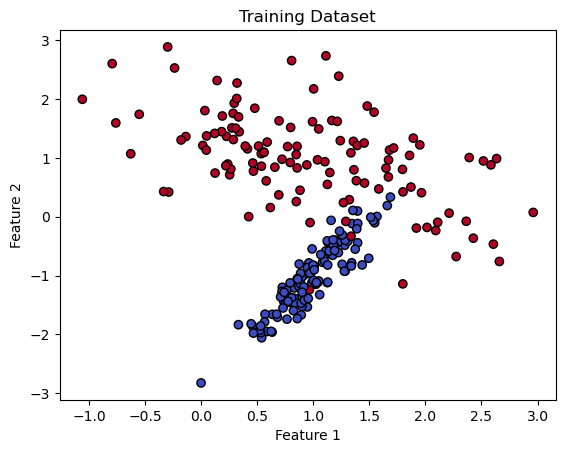

In [3]:
# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title("Training Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# Initialize and train the k-NN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

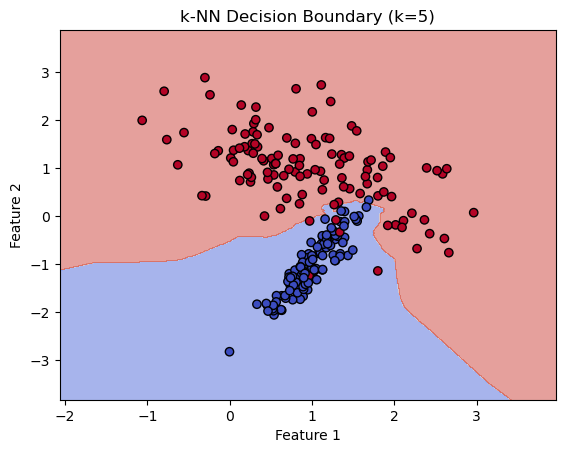

In [5]:
# Create a grid of points to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.title(f"k-NN Decision Boundary (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

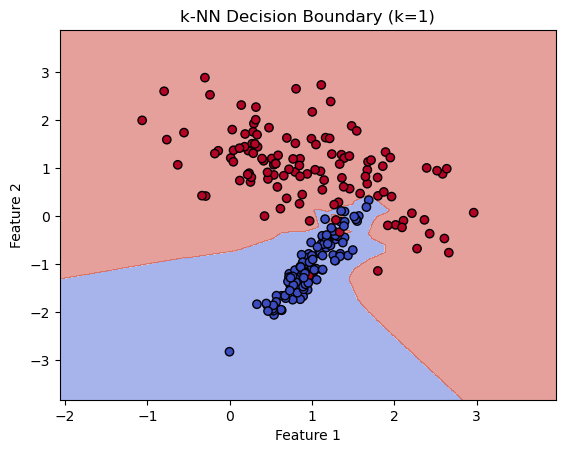

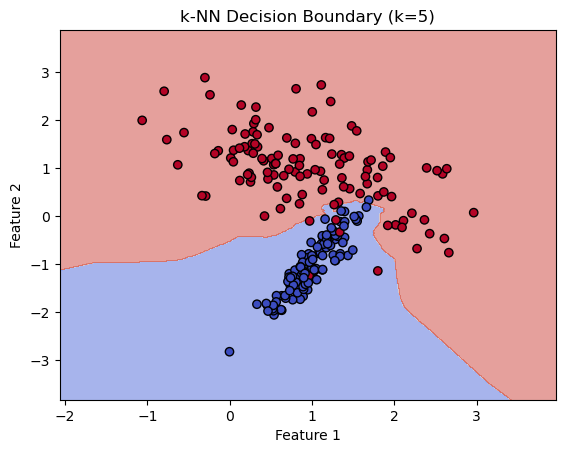

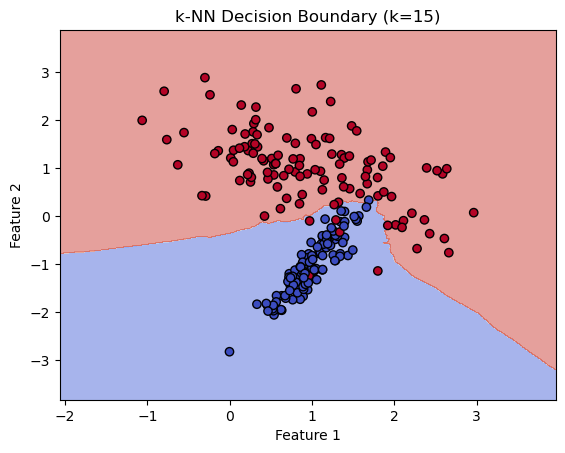

In [6]:
# Compare decision boundaries for different values of k
for k in [1, 5, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict the grid points
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
    plt.title(f"k-NN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()